In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part 1: Import Data

In [2]:
# Read CSV files from all 3 hospitals
g = pd.read_csv('test/general.csv')
p = pd.read_csv('test/prenatal.csv')
s = pd.read_csv('test/sports.csv')

# Sets the number of columns to display in terminal
pd.set_option('display.max_columns', 8)

# Create dataframe objects for each hospital
general = pd.DataFrame(g)
prenatal = pd.DataFrame(p)
sports = pd.DataFrame(s)

# Change all the column names to match general
columns = ['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis', 'blood_test', 'ecg',
           'ultrasound', 'mri', 'xray', 'children', 'months']
cols_nan = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']

# Assign new column names to prenatal and sports dataset
prenatal.columns = columns
sports.columns = columns

Part 2: Merge Together

In [3]:
# Combine all 3 datasets together
df = pd.concat([general, prenatal, sports], ignore_index=True)

Part 3: Clean Data

In [4]:
# Delete the first column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(how='all', inplace=True)

# Change gender column to be 'm' or 'f'
replace_value = {'female': 'f', 'woman': 'f', 'male': 'm', 'man': 'm'}
df.replace({'gender': replace_value}, inplace=True)

# Prenatal, if NaN than change to 0
df.loc[df.hospital == 'prenatal', 'gender'] = 'f'

# Replace NaN with zeros in selected columns
df[cols_nan] = df[cols_nan].fillna(value=0)

Part 4: Analyze Data

In [5]:
# 1. Which hospital has the highest number of patients?
num_hospitals = df['hospital'].unique()
num_patients = {}

for i in num_hospitals:
    """
    Loops through each hospital, and assigns the hospital name and patient count to dictionary.
    """
    num_patients[i] = (df.hospital == i).sum()

# Finds the hospital with the highest number of patients
highest_num = max(num_patients, key=num_patients.get)

# 2. What share of the patients in the general hospital suffers from stomach-related issues?
# Round the result to the third decimal place.
num_stomach = df[(df["hospital"] == "general") & (df["diagnosis"] == 'stomach')]
stomach_ratio = round((len(num_stomach.index) / num_patients[highest_num]), 3)

# 3. What share of the patients in the sports hospital suffers from dislocation-related issues?
# Round the result to the third decimal place.
num_dislocation = df[(df["hospital"] == "sports") & (df["diagnosis"] == 'dislocation')]
dislocation_ratio = round((len(num_dislocation.index) / num_patients['sports']), 3)

# What is the difference in the median ages of the patients in the general and sports hospitals?
# Filter dataframe by specific rows
general_data = df[df['hospital'] == 'general']
sports_data = df[df['hospital'] == 'sports']

# Calculate the median from each hospital
general_median = general_data['age'].median()
sports_median = sports_data['age'].median()
age_median = abs(general_median - sports_median)

# Which hospital took the most blood test? Total counts against all t values.
# How many blood tests were taken?

"""
1. Count the total number of 't' values in the blood_test column
2. Calculate how many 't' values from each hospital.
3. Determine how many tests from each hospital was taken
"""
total_tests = df[df['blood_test'] == 't']['hospital'].count()
blood_test_set = df[["hospital", "blood_test"]]
only_test_taken = blood_test_set[blood_test_set["blood_test"] == 't']

hospital_tests = {}

# Creates a subset of the dataframe by hospital
for i in num_hospitals:
    a = only_test_taken[only_test_taken["hospital"] == i]
    hospital_tests[i] = len(a)

most_test_hospital = max(hospital_tests, key=hospital_tests.get)
most_test_count = hospital_tests[most_test_hospital]

# Print summaries
# print(f'The answer to the 1st question is {highest_num}')
# print(f'The answer to the 2nd question is {stomach_ratio}')
# print(f'The answer to the 3rd question is {dislocation_ratio}')
# print(f'The answer to the 4th question is {age_median}')
# print(f'The answer to the 5th question is {most_test_hospital}, {most_test_count} blood tests')

Part 5: Visualize It

<AxesSubplot:title={'center':'Most Common Age'}, ylabel='Frequency'>

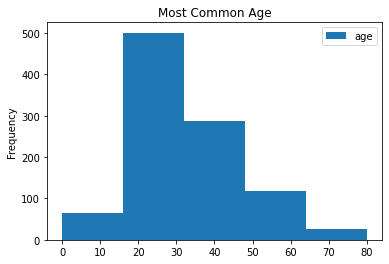

In [22]:
"""
What is the most common age of a patient among all hospitals? 
Plot a histogram and choose one of the following age ranges: 0 - 15, 15 - 35, 35 - 55, 55 - 70, or 70 - 80
"""
df.plot(y='age', kind='hist', bins=5, title='Most Common Age')

<AxesSubplot:title={'center':'Most Common Diagnosis'}, ylabel='Diagnosis'>

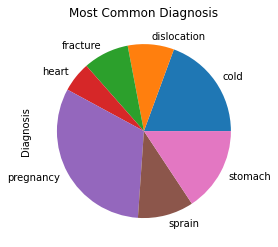

In [23]:
"""
What is the most common diagnosis among patients in all hospitals? Create a pie chart.
"""
df.groupby('diagnosis').size().plot(kind='pie', title="Most Common Diagnosis", ylabel='Diagnosis')

/Users/brandonlaw/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Height')

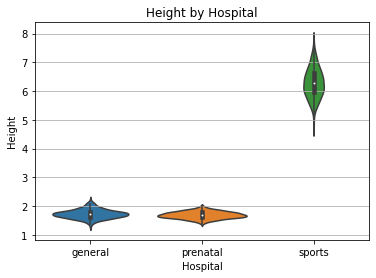

In [27]:
"""
Build a violin plot of height distribution by hospitals. 
1. What is the main reason for the gap in values? 
    The main reason for the gap in values is because the average height of Males and Females from sports hospital is roughly 4x more than general and prenatal.
2. Why there are two peaks, which correspond to the relatively small and big values? 
    The two different types peaks refer to the distribution of the height from each hospital. A horizontal peak (general and prenatal) means the heights are distributed very closely to the mean while a vertical peak means there is more variation in height.
    
"""
fig, axes = plt.subplots()
sns.violinplot('hospital','height', data=df, ax = axes)
axes.set_title('Height by Hospital')

axes.yaxis.grid(True)
axes.set_xlabel('Hospital')
axes.set_ylabel('Height')

In [7]:
# # Printing random 20 rows from combined data set
# print(df.shape)
# print(df.sample(n=20, random_state=30))

#
# print(f'The answer to the 1st question: 15 - 35')
# print(f'The answer to the 2nd question: pregnancy')
# print(f'The answer to the 3rd question: It\'s because The main reason for the gap in values is because the average height of Males and Females from sports hospital is roughly 4x more than general and prenatal. The two different types peaks refer to the distribution of the height from each hospital. A horizontal peak (general and prenatal) means the heights are distributed very closely to the mean while a vertical peak means there is more variation in height.')

In [37]:
df_height = df.sort_values(by='height', ascending=False)

In [39]:
# Mean height of Males and Females from each hospital.
df_height.groupby(['hospital', 'gender'])['height'].mean()

hospital  gender
general   f         1.682466
          m         1.771529
prenatal  f         1.690862
sports    f         6.116248
          m         6.454651
Name: height, dtype: float64